## Introduction ML

### Lab

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Part 1. Scikit-learn basics

#### 1. Estimators

In [3]:
#Consider toy dataset
X = np.array([[ 1,  2,  3], [11, 12, 13]])
y = np.array([2.1, 11.9])
print(X.shape, y.shape)

X_test =  np.array([[ 2, 3, 4]])
print(X_test.shape)

(2, 3) (2,)
(1, 3)


In [4]:
from sklearn.linear_model import LinearRegression

# Init the model and set all the hyperparameters (if there are any)
lr = LinearRegression()

# Train the model
lr.fit(X, y)
# make a prediction
lr.predict(X_test)

array([3.08])

#### 2. Transformer

In [5]:
from sklearn.preprocessing import StandardScaler
# Init, fit and transform

scaler = StandardScaler()

In [6]:
# the same, but in 1 line
scaler.fit_transform(X)

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

#### 3. Pipeline

In [7]:
from sklearn.pipeline import Pipeline
# create a pipeline
pipeline = Pipeline([("scaler", StandardScaler()), ("lr",LinearRegression())])
# fit the whole pipeline
pipeline.fit(X, y)

# we can now use it like any other estimator and make a prediction
pipeline.predict(X_test)

array([3.08])

In [8]:
# init modela and transformer
lr = LinearRegression()
scaler = StandardScaler()

# Fit transformer
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Fit the model
lr.fit(X_scaled, y)

# Predict
lr.predict(scaler.transform(X_test))

array([3.08])

## Part 2. Using sklearn pipeline

In [9]:
data = pd.read_csv('./data/house_prices_small.csv')
data.head()

,SalePrice,LotArea,OverallQual,SaleCondition,YearBuilt
0,208500,8450,7,Normal,2003
1,181500,9600,6,Normal,1976
2,223500,11250,7,Normal,2001
3,140000,9550,7,Abnorml,1915
4,250000,14260,8,Normal,2000


### 1. Prepare the data

#### 1.1 explore the data

In [10]:
data.head()

,SalePrice,LotArea,OverallQual,SaleCondition,YearBuilt
0,208500,8450,7,Normal,2003
1,181500,9600,6,Normal,1976
2,223500,11250,7,Normal,2001
3,140000,9550,7,Abnorml,1915
4,250000,14260,8,Normal,2000


In [13]:
data.isna().sum()

SalePrice        0
LotArea          0
OverallQual      0
SaleCondition    0
YearBuilt        0
dtype: int64

#### 1.2 Separate features form the target and perform train-test split

In [14]:
from sklearn.model_selection import train_test_split
tr, te = train_test_split(data)
y_train = tr.SalePrice
X_train = tr.drop(["SalePrice"], axis=1)

y_test = te.SalePrice
X_test = te.drop(["SalePrice"], axis=1)

#### 1.3 Encode categorical and ordinal features, scale numerical ones

In [17]:
X_train.head()

,LotArea,OverallQual,SaleCondition,YearBuilt
1021,7406,7,Partial,2006
1399,6171,6,Normal,1925
1251,3136,7,Normal,2003
722,8120,4,Normal,1970
894,7018,5,Alloca,1979


How to preprocess the features:

- LotArea, YearBuilt - numerical features, scale
- SaleCondition - categorical feature, one-hot encoding
- OverallQual - ordinal feature, no need to encode
- That being said, we need to apply different transformations to different columns. It can be done with ColumnTransformer:

ColumnTransformer([
    ('name1', transorm1, column_names1),
    ('name2', transorm2, column_names2)
])

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['SaleCondition']),
    ('scaling', StandardScaler(), ['LotArea', 'YearBuilt']),
], remainder='passthrough')

### 2. Train the model

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('col_transformer', transformer),
    ('regression', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['SaleCondition']),
                                                 ('scaling', StandardScaler(),
                                                  ['LotArea', 'YearBuilt'])])),
                ('regression', LinearRegression())])

### 3. Evaluate on the test set

In [21]:
y_pred = pipe.predict(X_test)
np.mean((y_pred - y_test)**2)**0.5

40605.6416762108

In [ ]:
y_pred = pipe.predict(X_test)
np.mean((y_pred - y_test)**2)**0.5

## Part 3. Extract feature from texts and images

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits['images'].shape)
print(digits['data'].shape)
print(digits['target'].shape)

(1797, 8, 8)
(1797, 64)
(1797,)


In [23]:
# images contain 8x8 black'n'white pictures of hadwritten digits
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### 1. Explore the data

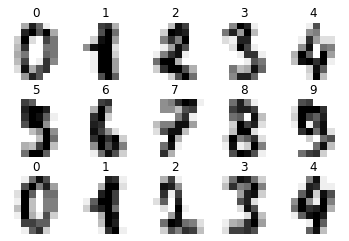

In [27]:
_, axes = plt.subplots(3,5)
axes = axes.flatten()
for ax, image, label in zip(axes, digits['images'], digits['target']):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(label)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'])

#### 2. Train the model

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

#### 3. Evaluate on test dataset¶

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [35]:
def my_accuracy(true, predicted):
    # your code here
    return np.sum(true == predicted) / len(true)
    
# test that your function work the same as `accuracy_score` from sklearn
my_accuracy(y_test, y_pred)

0.9666666666666667

## Part4. Text

### 1. Convert documents to vectors

In [36]:
d1 = "This is my favourite movie"
d2 = "Is this movie boring? Yes, it is!"
d3 = "This is an exiting movie"

In [37]:
import re
D = [re.sub('[.!?,]', '', d.lower()).split(' ') for d in [d1, d2, d3]]
D

[['this', 'is', 'my', 'favourite', 'movie'],
 ['is', 'this', 'movie', 'boring', 'yes', 'it', 'is'],
 ['this', 'is', 'an', 'exiting', 'movie']]

In [41]:
all_words = sum(D, [])
V = list(set(all_words))
print(V)

['favourite', 'yes', 'my', 'movie', 'this', 'it', 'is', 'boring', 'an', 'exiting']


In [42]:
X = np.zeros((len(D), len(V)))

for j, v in enumerate(V):
    for i , d in enumerate(D):
        X[i,j] = sum([1 for w in d if w == v])

In [43]:
X

array([[1., 0., 1., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 2., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 1., 1.]])

#### Option 2. Tf-idf

**Term Frequency times Inverce Document Frequency**

A method to describe each document in the dataset with a vector of the same length. Takes into account, how often the word appears in the whole dataset.



**Term frequency (tf)** - number of times a term occurs in a given document
$$
tf(t, d) = \frac{\# t \text{ in } d}{len(d)}
$$


**Inverce document frequency (idf)** - measures informativeness of a term

$$
idf(t) = \log \frac{N}{(\# d \text{ with } t)} , N - \text{ number of documents}
$$

If the word occures almost in all the documents (e.g. article, popular verb), then $idf$ will be very low.

---
Now we can covert each document onti the vector of size $M$:
$$
d \rightarrow \left(tf(t_1, d)\cdot idf(t_1),\,\, \dots, \,\, tf(t_M, d) \cdot idf(t_M)\right)
$$


---
Let us calculate it for our simple example

In [46]:
# tf
tf = np.zeros((len(D), len(V)))

for j, v in enumerate(V):
    for i , d in enumerate(D):
        tf[i,j] = sum([1 for w in d if w == v])/len(d)
tf

array([[0.2       , 0.        , 0.2       , 0.2       , 0.2       ,
        0.        , 0.2       , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.14285714, 0.14285714,
        0.14285714, 0.28571429, 0.14285714, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.2       , 0.2       ,
        0.        , 0.2       , 0.        , 0.2       , 0.2       ]])

In [47]:
#idf
idf = np.zeros(len(V))

for j, v in enumerate(V):
    idf[j] = np.log(len(D)/ sum([1 for d in D if v in d]))

idf

array([1.09861229, 1.09861229, 1.09861229, 0.        , 0.        ,
       1.09861229, 0.        , 1.09861229, 1.09861229, 1.09861229])

In [48]:
X = tf*idf
np.round(X, 2)

array([[0.22, 0.  , 0.22, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.16, 0.  , 0.  , 0.  , 0.16, 0.  , 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.22]])